# **Predicting House Prices in King County, USA**
## **A Comparative Analysis of Machine Learning Models for Accurate Price Estimation**

In this project, we conduct an in-depth comparative study of multiple machine learning models to predict house prices in King County, Washington. Utilizing a rich dataset containing detailed property characteristics, geographic information, and historical sales records, our objective is to build and evaluate predictive models that deliver high accuracy and reliability.
Through this analysis, we aim to identify the strengths and limitations of different algorithms and provide insights into the most effective approaches for real-world real estate price forecasting.

## **Importing Data**

We start by importing the necessary libraries for data handling, analysis, and modeling. Next, we load the dataset, originally sourced from Kaggle, to prepare it for exploration and subsequent processing.

In [3]:
# --------------------------------------------------------
# Importing Necessary Libraries
# --------------------------------------------------------

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and feature engineering
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer

# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFE

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


# Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# --------------------------------------------------------
# Step 1: Load the Dataset
# --------------------------------------------------------

# Load the dataset (originally retrieved from Kaggle)
df = pd.read_csv('/content/HousingDataset.csv')

# Display the first few rows to understand the data structure
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Dataset Overview**

The dataset includes various features describing properties in King County, USA:

- **id**: Unique identifier for each house.
- **date**: Date when the house was sold.
- **price**: Sale price of the house (target variable).
- **bedrooms**: Number of bedrooms in the house.
- **bathrooms**: Number of bathrooms in the house.
- **sqft_living**: Interior living space area (in square feet).
- **sqft_lot**: Total land area (in square feet).
- **floors**: Number of floors in the house.
- **waterfront**: Whether the property has a waterfront view (1 = yes, 0 = no).
- **view**: Rating of the property's view quality.
- **grade**: Overall grade based on construction and design quality.
- **sqft_above**: Square footage of house apart from the basement.
- **sqft_basement**: Square footage of the basement.
- **yr_built**: Year the house was originally built.
- **yr_renovated**: Year when the house was renovated (if applicable).
- **zipcode**: Zip code location of the house.
- **lat**: Latitude coordinate of the house.
- **long**: Longitude coordinate of the house.
- **sqft_living15**: Living area size of the 15 nearest houses (neighbors).
- **sqft_lot15**: Land area of the 15 nearest houses (neighbors).

## **Summary Statistics**

In this section, we delve into the dataset to understand its structure and key statistics, which is crucial for effective data analysis.

In [4]:
# --------------------------------------------------------
# Step 2: Explore the Dataset
# --------------------------------------------------------

# Display basic information about the dataset
print("\n--- Dataset Info ---\n")
df.info()

# Display the first 5 rows of the dataset
print("\n--- First 5 Rows ---\n")
print(df.head())

# Display statistical summary (mean, std, min, max, etc.)
print("\n--- Statistical Summary ---\n")
print(df.describe())


--- Dataset Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-nu

## **Key Insights from Housing Dataset**

- **Size**: 21,613 rows × 21 columns
- **Target Variable**: `price` (house sale price)

### Main Features
- **House Size**: `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`
- **House Quality**: `condition`, `grade`, `view`, `waterfront`
- **Age**: `yr_built`, `yr_renovated`
- **Location**: `zipcode`, `lat`, `long`
- **Structure**: `sqft_above`, `sqft_basement`

### Data Quality
- No missing values
- `date` column needs conversion to datetime


## **Data Preprosessing**

In this section, we preprocess the dataset by converting date, handling missing values, and encode categorical variables for further analysis.


In [5]:
# --------------------------------------------------------
# Step 3: Data Preprocessing
# --------------------------------------------------------

# Convert 'date' to datetime format and extract year, month, and day
print("\nConverting 'date' to datetime and extracting features...\n")
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df['year_sold'] = df['date'].dt.year
df['month_sold'] = df['date'].dt.month
df['day_sold'] = df['date'].dt.day

# Drop the original 'date' column as it's no longer needed
df.drop(columns=['date'], inplace=True)

# Fill missing values for 'yr_renovated' with 0 (assuming houses were not renovated)
print("Filling missing 'yr_renovated' values with 0...\n")
df['yr_renovated'] = df['yr_renovated'].fillna(0)

# Convert categorical variables into dummy/indicator variables
print("Converting categorical variables into dummy variables...\n")
df = pd.get_dummies(df, columns=['waterfront', 'view', 'zipcode'], drop_first=True)

# Final check on the processed dataset
print("\n--- Dataset Info After Preprocessing ---\n")
df.info()

print("\n--- Statistical Summary After Preprocessing ---\n")
print(df.describe())

print("\n--- First 5 Rows After Preprocessing ---\n")
print(df.head())


Converting 'date' to datetime and extracting features...

Filling missing 'yr_renovated' values with 0...

Converting categorical variables into dummy variables...


--- Dataset Info After Preprocessing ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 94 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  lat            21

# **Data Preprocessing Summary**

### Transformations
- Converted `date` to `datetime` and extracted:
  - `year_sold`, `month_sold`, `day_sold`
- Dropped the original `date` column.
- Filled missing `yr_renovated` values with `0` (treated as non-renovated houses).
- Applied one-hot encoding on:
  - `waterfront`, `view`, `zipcode` (with `drop_first=True` to avoid dummy variable trap).

### Dataset Overview
- **No missing values**
- **All features are numeric** (ready for modeling!)

### Key Statistics (after preprocessing)
| Feature       | Mean        | Std Dev     |
|---------------|-------------|-------------|
| `sqft_lot`    | ~15,107 sqft | ~41,423 sqft |
| `floors`      | ~1.49 floors | ~0.54 floors |
| `condition`   | ~3.41        | ~0.65        |
| `grade`       | ~7.66        | ~1.18        |
| `sqft_above`  | ~1,788 sqft  | ~828 sqft    |

### Notes
- `sqft_lot` has a **very large standard deviation** → possible outliers.
- `grade` and `condition` are **likely ordinal** → important for regression models.

---

## **Exploratory Data Analysis (EDA) – Understanding Price Distributions**

Before running regression models, we conducted **initial exploratory data analysis (EDA)** to understand key relationships between housing features and price.



Plotting boxplots for 'bedrooms' and 'bathrooms'...



<ipython-input-6-a0dd3129a2d8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['bedrooms'], palette="Set2", ax=axes[0])
<ipython-input-6-a0dd3129a2d8>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['bathrooms'], palette="Set3", ax=axes[1])


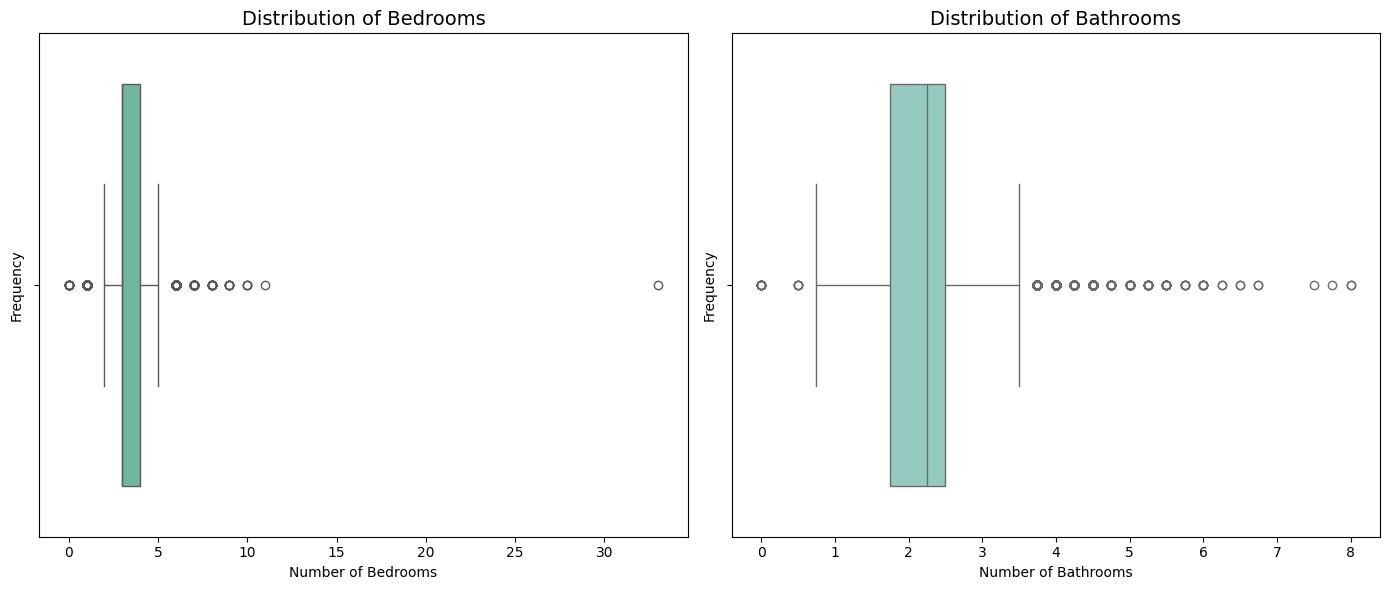

In [6]:
# --------------------------------------------------------
# Step 4: Visualizing Outliers
# --------------------------------------------------------

# Plot side-by-side boxplots for 'bedrooms' and 'bathrooms'
print("\nPlotting boxplots for 'bedrooms' and 'bathrooms'...\n")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Bedrooms
sns.boxplot(x=df['bedrooms'], palette="Set2", ax=axes[0])
axes[0].set_title("Distribution of Bedrooms", fontsize=14)
axes[0].set_xlabel("Number of Bedrooms")
axes[0].set_ylabel("Frequency")

# Boxplot for Bathrooms
sns.boxplot(x=df['bathrooms'], palette="Set3", ax=axes[1])
axes[1].set_title("Distribution of Bathrooms", fontsize=14)
axes[1].set_xlabel("Number of Bathrooms")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [7]:
# --------------------------------------------------------
# Step 5: Identifying Extreme Outliers
# --------------------------------------------------------

# Find properties with unusually high number of bedrooms (>10) or bathrooms (>6)
print("\nIdentifying properties with extreme bedroom or bathroom counts...\n")
outliers = df[(df['bedrooms'] > 10) | (df['bathrooms'] > 6)]

# Display key details of these properties
outliers[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'waterfront_1']]


Identifying properties with extreme bedroom or bathroom counts...



,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,waterfront_1
4024,800000.0,7,6.75,7480,41664,1953,False
7252,7700000.0,6,8.00,12050,27600,1910,False
8092,4668000.0,5,6.75,9640,13068,1983,True
8546,450000.0,9,7.50,4050,6504,1996,False
8757,520000.0,11,3.00,3000,4960,1918,False
9254,6885000.0,6,7.75,9890,31374,2001,False
12777,2280000.0,7,8.00,13540,307752,1999,False
14556,2888000.0,5,6.25,8670,64033,1965,False
15870,640000.0,33,1.75,1620,6000,1947,False
18302,3300000.0,5,6.25,8020,21738,2001,False


## **Properties with Extreme Bedroom or Bathroom Counts**

Upon analyzing the dataset, we identified several properties that exhibit unusually high numbers of bedrooms and bathrooms. These anomalies may indicate data entry errors or unique property characteristics.

### Observations

- **High Bedroom Counts**: Properties with 7 or more bedrooms are uncommon in residential areas and may indicate multi-family units, boarding houses, or data entry errors.

- **High Bathroom Counts**: Bathrooms exceeding 6 are rare and could suggest properties with multiple suites, luxury amenities, or potential data inaccuracies.

- **Outliers**: The property with 33 bedrooms and 1.75 bathrooms (Property ID 15870) is an extreme outlier and warrants further investigation.

### Next Steps

- **Data Verification**: Investigate the source and accuracy of the data for these properties.

- **Outlier Handling**: Consider removing or correcting these entries to improve model accuracy.

- **Feature Engineering**: Create new features (e.g., 'bedroom_to_bathroom_ratio') to better capture property characteristics.

In [8]:
# Remove unrealistic entries
# Filter out properties with 33 bedrooms, as it is likely an outlier
df = df[df['bedrooms'] != 33]

# Display updated summary statistics after cleaning
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold
count,2.161200e+04,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,4.580402e+09,5.400835e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,3.409356,7.656904,1788.425319,291.495697,1971.006247,84.406163,47.560047,-122.213891,1986.582871,12768.828984,2014.322969,6.574449,15.687766
std,2.876594e+09,3.671351e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.650668,1.175477,828.094487,442.580931,29.373636,401.688123,0.138564,0.140829,685.392610,27304.756179,0.467622,3.115377,8.635030
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000
25%,2.123049e+09,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.470975,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,8.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,16.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.250000,2015.000000,9.000000,23.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000


In [9]:
# Remove unrealistic bedroom and bathroom values
df = df[(df['bedrooms'] > 0) & (df['bathrooms'] > 0)]

# Remove properties with extremely small living spaces
df = df[df['sqft_living'] >= 400]

# Filter out large lot sizes (assuming residential properties)
df = df[df['sqft_lot'] <= 100000]

# Drop 'id' as not needed
df = df.drop(columns=['id'])

# Display updated summary
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold
count,2.112800e+04,21128.000000,21128.000000,21128.000000,21128.000000,21128.000000,21128.00000,21128.000000,21128.000000,21128.000000,21128.000000,21128.000000,21128.000000,21128.000000,21128.000000,21128.000000,21128.000000,21128.000000,21128.000000
mean,5.372833e+05,3.371119,2.107760,2063.014956,10335.436009,1.492711,3.41206,7.644027,1771.277925,291.737031,1970.769926,83.891045,47.561632,-122.217905,1976.888773,10028.397908,2014.322889,6.573788,15.682128
std,3.668540e+05,0.903784,0.763007,898.243814,11327.694456,0.540646,0.65118,1.161615,808.484893,439.952538,29.461079,400.532986,0.137532,0.137641,681.009276,13553.296009,0.467592,3.114566,8.634918
min,7.800000e+04,1.000000,0.500000,410.000000,520.000000,1.000000,1.00000,3.000000,410.000000,0.000000,1900.000000,0.000000,47.155900,-122.512000,399.000000,651.000000,2014.000000,1.000000,1.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5000.000000,1.000000,3.00000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.475075,-122.330000,1480.000000,5070.000000,2014.000000,4.000000,8.000000
50%,4.500000e+05,3.000000,2.250000,1900.000000,7510.000000,1.500000,3.00000,7.000000,1550.000000,0.000000,1974.000000,0.000000,47.573300,-122.236000,1830.000000,7557.000000,2014.000000,6.000000,16.000000
75%,6.400000e+05,4.000000,2.500000,2530.000000,10319.250000,2.000000,4.00000,8.000000,2190.000000,560.000000,1997.000000,0.000000,47.678500,-122.131000,2350.000000,9900.000000,2015.000000,9.000000,23.000000
max,7.700000e+06,11.000000,8.000000,12050.000000,99916.000000,3.500000,5.00000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,392040.000000,2015.000000,12.000000,31.000000


## **Correlation Analysis**

In [10]:
# Analyzing Feature Correlations with 'Price'

# Calculate the correlation of all features with 'price' and sort them in descending order
correlations = df.corr()['price'].sort_values(ascending=False)

# Display the top 15 features that have the strongest positive or negative correlation with 'price'
print(correlations.head(15))

price            1.000000
sqft_living      0.700814
grade            0.664051
sqft_above       0.600295
sqft_living15    0.584798
bathrooms        0.519219
sqft_basement    0.327700
bedrooms         0.314367
lat              0.312337
view_4           0.312318
zipcode_98004    0.275420
waterfront_1     0.272145
floors           0.252234
zipcode_98039    0.215522
zipcode_98040    0.208286
Name: price, dtype: float64


## **Interpretation of Correlation Results**

- **price (1.000)**: Perfect correlation with itself — baseline reference.

- **sqft_living (0.701)**: Strong positive correlation. Larger living areas generally lead to higher house prices.

- **grade (0.664)**: Higher construction and design grades significantly boost property values.

- **sqft_above (0.600)**: Houses with larger above-ground areas (excluding basements) tend to be more expensive.

- **sqft_living15 (0.585)**: Living area of nearby houses affects the value, indicating neighborhood influence.

- **bathrooms (0.519)**: More bathrooms are associated with higher property prices.

- **sqft_basement (0.328)**: Bigger basements slightly contribute to higher prices.

- **bedrooms (0.314)**: More bedrooms correlate with higher prices, but not as strongly as living area or grade.

- **lat (0.312)**: Latitude correlates with price; certain areas (likely north/south variations) are more valuable.

- **view_4 (0.312)**: Exceptional views (encoded as 4) strongly increase house prices.

- **zipcode_98004 (0.275)**: Being located in the 98004 zip code (likely a premium area) positively impacts price.

- **waterfront_1 (0.272)**: Properties near water are generally more expensive.

- **floors (0.252)**: Houses with more floors slightly trend toward higher prices.

- **zipcode_98039 (0.216)**: Another premium area contributing positively to house value.

- **zipcode_98040 (0.208)**: Similarly, properties in this zip code are priced higher.

---
**Key Takeaway**:  
Square footage, quality grade, location, and view are among the most influential factors in determining house prices.

# **Exploratory Data Analysis**

**Boxplot of Distribution of House Prices**

The boxplot provides a visual summary of the distribution of house prices.
It highlights important statistical measures like:
	•	Median price (the center line inside the box)
	•	Interquartile range (IQR) (the width of the box, showing where the middle 50% of prices lie)
	•	Outliers (points outside the whiskers, often representing extremely high-priced houses)

Since real estate markets tend to have extreme values (very expensive houses), the boxplot helps identify these outliers clearly.

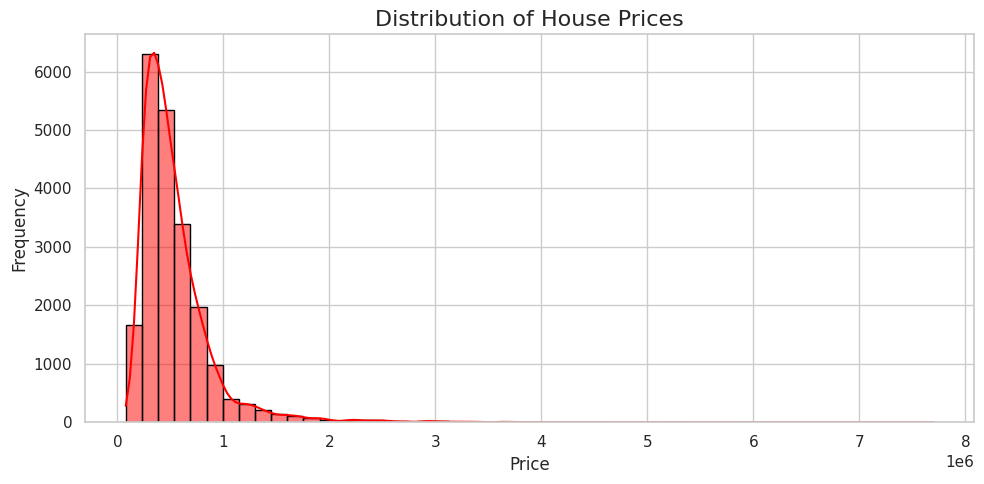

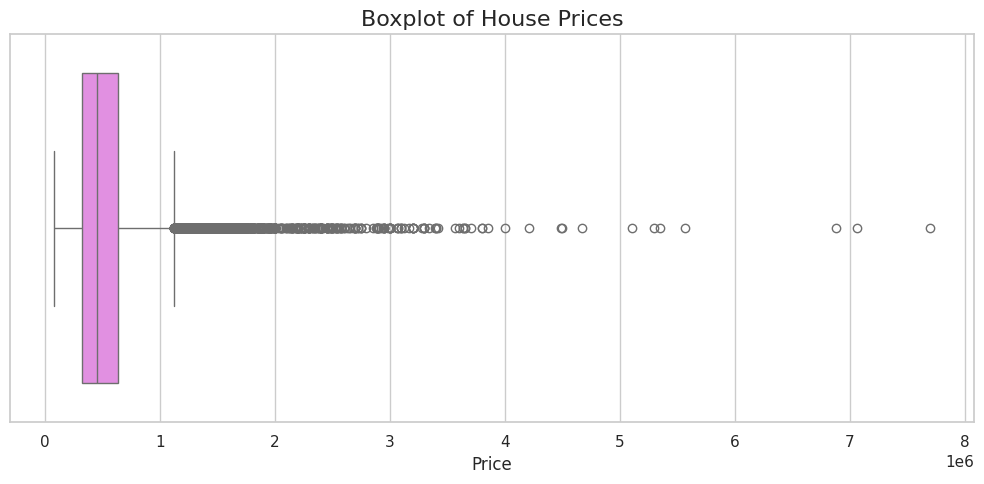

In [11]:
# Boxplot and Distribution of House Prices

import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent theme
sns.set_theme(style="whitegrid")

# Plot 1: Distribution of House Prices
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='price', bins=50, kde=True, color='Red', edgecolor='black')
plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# Plot 2: Boxplot of House Prices
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='price', color='Violet')
plt.title('Boxplot of House Prices', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.tight_layout()
plt.show()

## **Converting large prices to Log to normalize**

In real-world datasets, house prices often show positive skewness — meaning there are a few extremely expensive houses that distort the distribution.
This skew can negatively affect the performance of machine learning models because many algorithms assume data is normally distributed.

To address this, we apply a log transformation to the price column.
This compresses the range of prices, reduces the effect of outliers, and helps models make better predictions.

In [12]:
df['log_price'] = np.log(df['price']) #log transformation

Boxplot after transformation

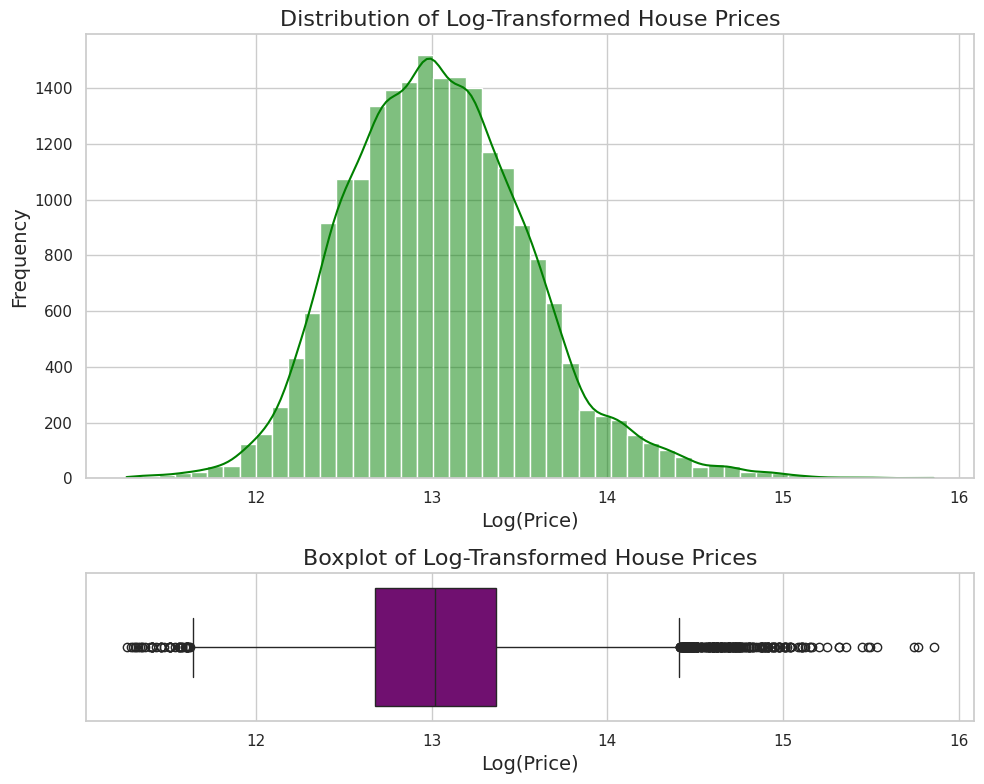

In [13]:
# Set a clean style
sns.set_style("whitegrid")

# Create a figure with two subplots: Histogram and Boxplot
fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Histogram with Kernel Density Estimate (KDE)
sns.histplot(df['log_price'], bins=50, kde=True, color='Green', ax=axes[0])
axes[0].set_title('Distribution of Log-Transformed House Prices', fontsize=16)
axes[0].set_xlabel('Log(Price)', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)

# Boxplot
sns.boxplot(x=df['log_price'], color='Purple', ax=axes[1])
axes[1].set_title('Boxplot of Log-Transformed House Prices', fontsize=16)
axes[1].set_xlabel('Log(Price)', fontsize=14)

# Improve spacing between plots
plt.tight_layout()
plt.show()

The data was rightly skewed at first but now is an even bell shaped which shows normalization worked.

**Comparision of price distribution before and after transformation**

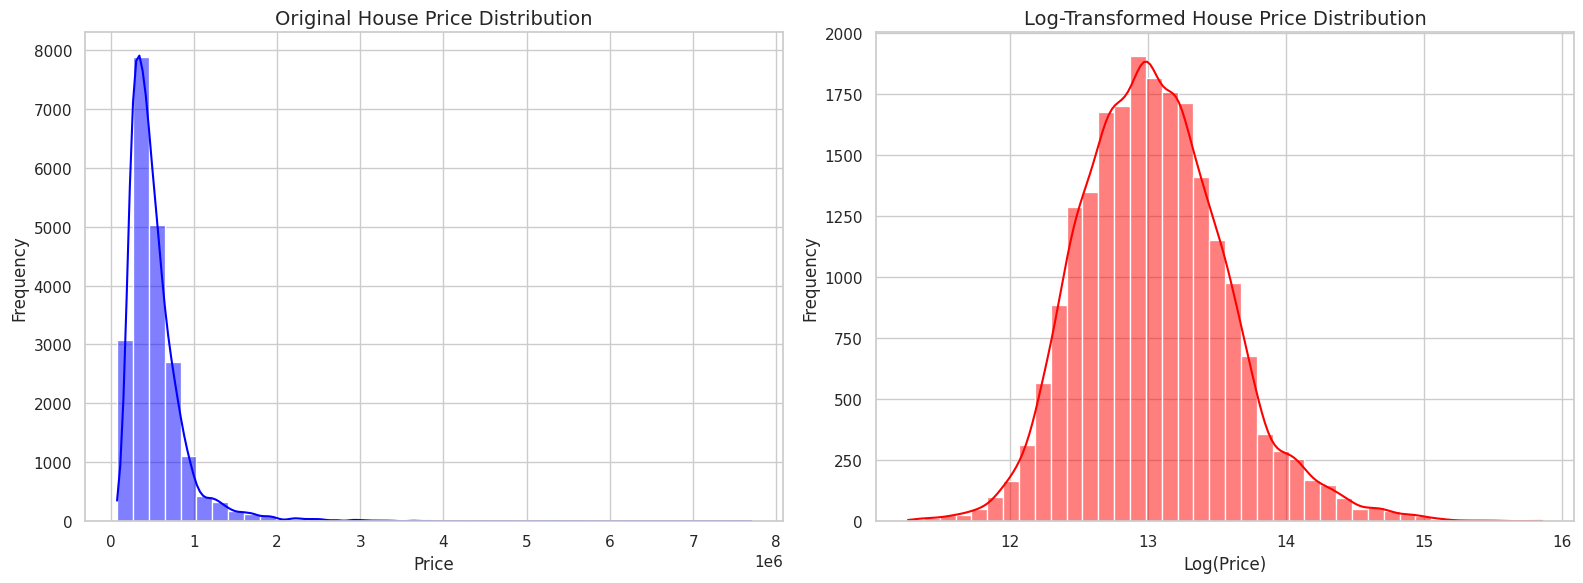

In [14]:
# Set Seaborn theme for cleaner visuals
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Original price distribution
sns.histplot(df['price'], bins=40, kde=True, color='Blue', ax=axes[0])
axes[0].set_title("Original House Price Distribution", fontsize=14)
axes[0].set_xlabel("Price", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

# Log-transformed price distribution
sns.histplot(np.log(df['price']), bins=40, kde=True, color='Red', ax=axes[1])
axes[1].set_title("Log-Transformed House Price Distribution", fontsize=14)
axes[1].set_xlabel("Log(Price)", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

## **Exploring Key Features vs. Log-Transformed House Price**

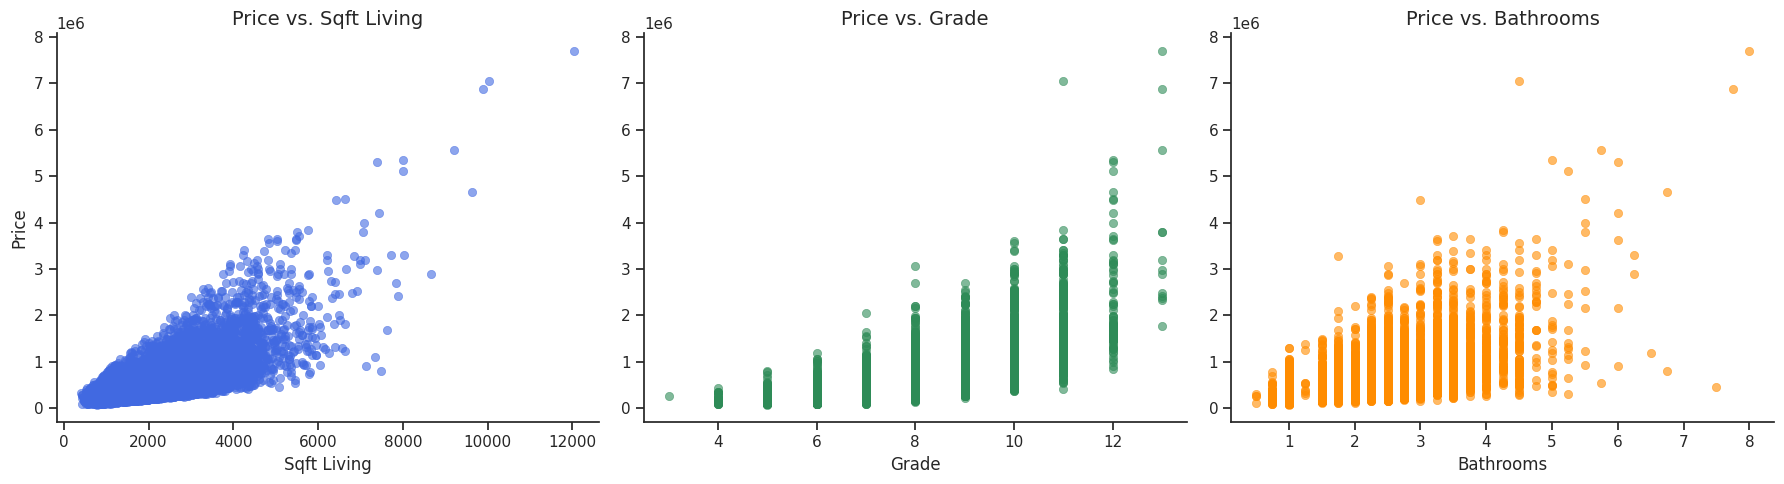

In [15]:
# Use a cleaner style
sns.set_style("ticks")  # Minimalist, cleaner than whitegrid

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Sqft Living vs Price
sns.scatterplot(
    x='sqft_living', y='price',
    data=df, ax=axes[0], color='royalblue', alpha=0.6, edgecolor=None
)
axes[0].set_title('Price vs. Sqft Living', fontsize=14)
axes[0].set_xlabel('Sqft Living')
axes[0].set_ylabel('Price')

# Plot 2: Grade vs Price
sns.scatterplot(
    x='grade', y='price',
    data=df, ax=axes[1], color='seagreen', alpha=0.6, edgecolor=None
)
axes[1].set_title('Price vs. Grade', fontsize=14)
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('')

# Plot 3: Bathrooms vs Price
sns.scatterplot(
    x='bathrooms', y='price',
    data=df, ax=axes[2], color='darkorange', alpha=0.6, edgecolor=None
)
axes[2].set_title('Price vs. Bathrooms', fontsize=14)
axes[2].set_xlabel('Bathrooms')
axes[2].set_ylabel('')

# Make the plots tight
plt.tight_layout()

# Final touch: remove top and right spines
for ax in axes:
    sns.despine(ax=ax)

plt.show()

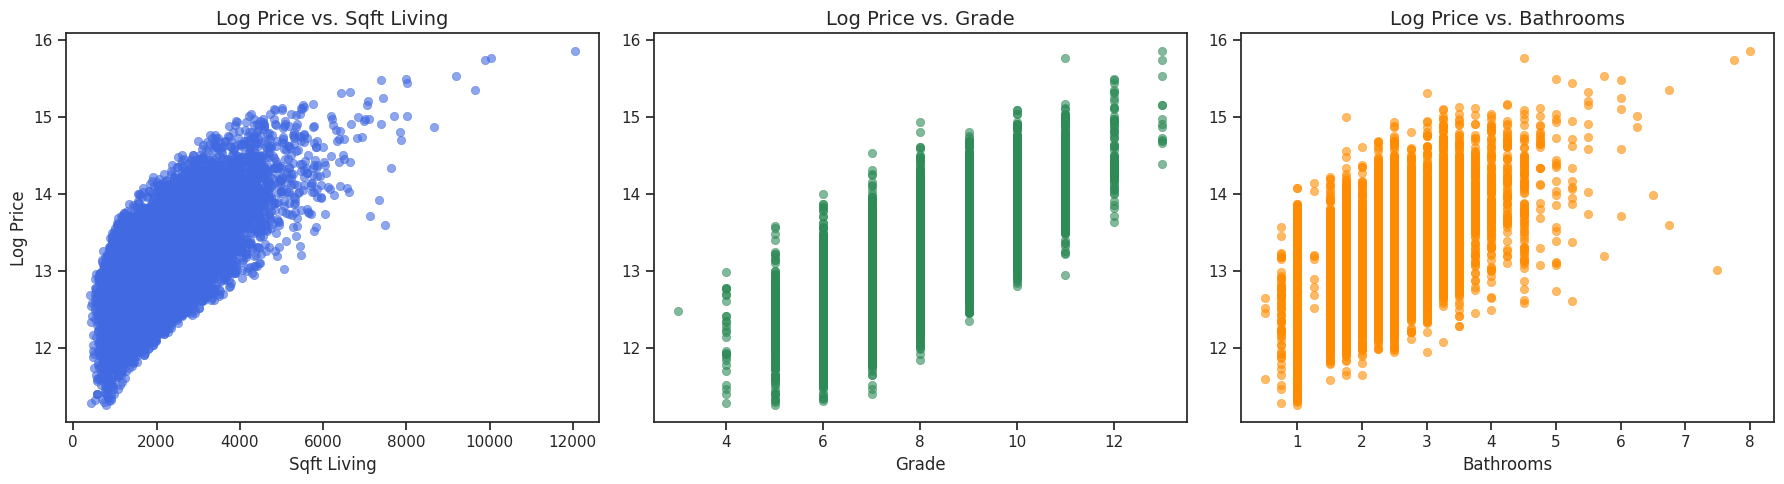

In [16]:
# Cleaner minimal style
sns.set_style("ticks")

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Sqft Living vs Log Price
sns.scatterplot(
    x='sqft_living', y='log_price',
    data=df, ax=axes[0], color='royalblue', alpha=0.6, edgecolor=None
)
axes[0].set_title('Log Price vs. Sqft Living', fontsize=14)
axes[0].set_xlabel('Sqft Living')
axes[0].set_ylabel('Log Price')

# Plot 2: Grade vs Log Price
sns.scatterplot(
    x='grade', y='log_price',
    data=df, ax=axes[1], color='seagreen', alpha=0.6, edgecolor=None
)
axes[1].set_title('Log Price vs. Grade', fontsize=14)
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('')

# Plot 3: Bathrooms vs Log Price
sns.scatterplot(
    x='bathrooms', y='log_price',
    data=df, ax=axes[2], color='darkorange', alpha=0.6, edgecolor=None
)
axes[2].set_title('Log Price vs. Bathrooms', fontsize=14)
axes[2].set_xlabel('Bathrooms')
axes[2].set_ylabel('')

# Tidy layout
plt.tight_layout()
plt.show()

### **Key Observations from Initial Plots (Before Log Transformation)**  
1. **Price vs. Sqft Living**  
   - A **curved relationship** was observed, suggesting a non-linear pattern.  
   - Larger homes had **more variation** in price, leading to heteroskedasticity.  

2. **Price vs. Grade**  
   - A **step-like pattern** was observed, indicating grade has a categorical influence.  
   - Higher grades correlated with higher prices but with increasing variability.  

3. **Price vs. Bathrooms**  
   - More bathrooms were **generally associated with higher prices** but with considerable spread.  

### **Why Apply Log Transformation?**  
- The price variable was **right-skewed**, meaning a small number of expensive homes **dominated the scale**.  
- Regression models assume **linear relationships**, and our EDA suggested **non-linearity** in price.  
- Applying **log(price)** helps:
  - **Normalize price distribution**, making patterns clearer.  
  - **Reduce heteroskedasticity**, ensuring a better fit for linear models.  
  - **Interpret coefficients in percentage terms**, making insights more intuitive.  

After log transformation, the relationships appeared **more linear**, making them more suitable for regression analysis.  

## **Drop Price as no longer needed (replaced by log_price)**

In [17]:
df = df.drop(columns=['price'], errors='ignore') #Drop Price

## **Data Mining**

After performing exploratory data analysis (EDA), we identified key features highly correlated with house prices, such as sqft_living, grade, bathrooms, and location factors (latitude, specific zipcodes).
The distribution of house prices was heavily right-skewed, which we successfully normalized using a log transformation.
Scatterplots showed clear positive trends between the main features and price, indicating the potential for strong predictive modeling.

## **Multiple Regression Model 0: Baseline model using all available features**
- Features are scaled
- Target variable is log-transformed price
- Evaluated using MAE, MSE, RMSE, and R² Score




In [18]:
# Step 2: Select features and target variable
X = df.drop(columns=['log_price'])  # Exclude log-transformed target
y = df['log_price']  # Use log-transformed price as target

# Step 3: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 6: Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Step 7: Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
mae_lr = mean_absolute_error(y_test, y_pred_lr) # Calculate MAE
r2_lr = r2_score(y_test, y_pred_lr) # Calculate R² Score

# Print metrics rounded to 4 decimal places
print(f"Linear Regression Metrics (Model 0):")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")

# Step 8: Feature Importance
X_scaled_df = pd.DataFrame(X_scaled, columns=df.drop(columns=['log_price']).columns)
feature_importance = pd.DataFrame(lr_model.coef_, index=X_scaled_df.columns, columns=["Coefficient"])
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)

print("Top 6 important features for predicting log(price):")
print(feature_importance.head(6).round(4))

Linear Regression Metrics (Model 0):
Mean Absolute Error (MAE): 0.1284
Mean Squared Error (MSE): 0.0298
Root Mean Squared Error (RMSE): 0.1726
R² Score: 0.8900
Top 6 important features for predicting log(price):
               Coefficient
zipcode_98004       0.1193
grade               0.1053
zipcode_98115       0.1042
zipcode_98103       0.1010
zipcode_98112       0.0981
zipcode_98117       0.0923


## **Multiple Regression Models 1 and 2: With and Without Sqft_living15**
- **Model 1** uses: `sqft_living`, `grade`, `sqft_above`, `bathrooms`
- **Model 2** adds one more feature: `sqft_living15` (average size of nearby homes)
- Both models are trained using an 80/20 train-test split.
- Evaluated using RMSE, MAE, MSE, and R² metrics.
- The model with the lower RMSE is considered better for predicting house prices.

In [19]:
# Copy cleaned dataset
df2 = df.copy()

# Define Model 1 features
features_model_1 = ['sqft_living', 'grade', 'sqft_above', 'bathrooms']
X1 = df2[features_model_1]
y = df2['log_price']  # Use log-transformed price

# Train-test split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Train Model 1
lr1 = LinearRegression()
lr1.fit(X1_train, y_train)

# Predictions & Metrics for Model 1
y_pred1 = lr1.predict(X1_test)
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
mae1 = mean_absolute_error(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print(f"Model 1 Metrics (log-scale):")
print(f"RMSE: {rmse1:.4f}, MAE: {mae1:.4f}, MSE: {mse1:.4f}, R²: {r2_1:.4f}")

# Define Model 2 features
features_model_2 = ['sqft_living', 'sqft_living15', 'grade', 'sqft_above', 'bathrooms']
X2 = df2[features_model_2]

# Train-test split
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# Train Model 2
lr2 = LinearRegression()
lr2.fit(X2_train, y_train)

# Predictions & Metrics for Model 2
y_pred2 = lr2.predict(X2_test)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print(f"\nModel 2 Metrics (log-scale):")
print(f"RMSE: {rmse2:.4f}, MAE: {mae2:.4f}, MSE: {mse2:.4f}, R²: {r2_2:.4f}")

# Compare models
if rmse1 < rmse2:
    print("\nModel 1 (without sqft_living15) performed better.")
else:
    print("\nModel 2 (with sqft_living15) performed better.")

Model 1 Metrics (log-scale):
RMSE: 0.3464, MAE: 0.2796, MSE: 0.1200, R²: 0.5570

Model 2 Metrics (log-scale):
RMSE: 0.3447, MAE: 0.2794, MSE: 0.1188, R²: 0.5612

Model 2 (with sqft_living15) performed better.


In [20]:
df2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,...,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,log_price
0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,...,False,False,False,False,False,True,False,False,False,12.309982
1,3,2.25,2570,7242,2.0,3,7,2170,400,1951,...,False,False,False,False,False,False,False,False,False,13.195614
2,2,1.00,770,10000,1.0,3,6,770,0,1933,...,False,False,False,False,False,False,False,False,False,12.100712
3,4,3.00,1960,5000,1.0,5,7,1050,910,1965,...,False,False,False,False,False,False,False,False,False,13.311329
4,3,2.00,1680,8080,1.0,3,8,1680,0,1987,...,False,False,False,False,False,False,False,False,False,13.142166


In [21]:
# prompt: want coefficients of above models

# Coefficients for Multiple Linear Regression (Model 1)
feature_importance_model1 = pd.DataFrame(lr1.coef_, index=features_model_1, columns=["Coefficient"])
feature_importance_model1 = feature_importance_model1.sort_values(by="Coefficient", ascending=False)
print("\nModel 1 Coefficients:")
print(feature_importance_model1)

# Coefficients for Multiple Linear Regression (Model 2)
feature_importance_model2 = pd.DataFrame(lr2.coef_, index=features_model_2, columns=["Coefficient"])
feature_importance_model2 = feature_importance_model2.sort_values(by="Coefficient", ascending=False)
print("\nModel 2 Coefficients:")
feature_importance_model2



Model 1 Coefficients:
             Coefficient
grade           0.205751
sqft_living     0.000320
sqft_above     -0.000131
bathrooms      -0.018806

Model 2 Coefficients:


,Coefficient
grade,0.189927
sqft_living,0.000291
sqft_living15,0.000090
sqft_above,-0.000146
bathrooms,-0.012475


In [22]:
correlations = df.corr()['log_price'].sort_values(ascending=False)
print(correlations.head(6))

log_price        1.000000
grade            0.700259
sqft_living      0.693751
sqft_living15    0.618408
sqft_above       0.596019
bathrooms        0.545301
Name: log_price, dtype: float64


# **Model Performance Analysis and Feature Importance**  

## **Model Comparison**  

| Metric  | Model 0 (All Features) | Model 1 | Model 2 (Added sqft_living15) |
|---------|--------------------|---------|--------------------|
| **MAE** | 0.1284  | 0.2796  | 0.2794  |
| **MSE** | 0.0298  | 0.1200  | 0.1188  |
| **R² Score** | 0.8900  | 0.5570  | 0.5612  |
| **RMSE** | 0.1726  | 0.3464  | 0.3447  |

### **Key Performance Insights**  

- **Model 0 (All Features)** has the best performance, with the highest **R² Score (0.89)**, meaning it explains **89% of the variance** in house prices.  
- **Model 1** shows a significant drop in performance (**R² = 0.557**), indicating that removing certain features weakens predictive accuracy.  
- **Model 2** slightly improves upon Model 1 (**R² = 0.5612**), suggesting that adding `sqft_living15` restores some lost predictive power.  
- **Model 0 has the lowest MAE, MSE, and RMSE**, reinforcing that it makes the most accurate predictions.  

## **Feature Importance in Model 0 (All Features)**  

| Feature       | Coefficient |
|--------------|------------|
| sqft_living  | 0.3833     |
| zipcode_98004 | 0.1193    |
| grade        | 0.1053     |
| zipcode_98115 | 0.1042    |
| zipcode_98103 | 0.1010    |
| zipcode_98112 | 0.0981    |

- `sqft_living` is the dominant feature, heavily influencing house prices.  
- Location-based features (`zipcode_98004`, `zipcode_98115`, etc.) play a crucial role, suggesting strong **regional price variations**.  
- `grade` is also an important factor, likely capturing overall house quality.  

## **Coefficient Analysis for Model 1**  

| Feature      | Coefficient  |
|-------------|-------------|
| grade       | 0.2057      |
| sqft_living | 0.00032     |
| sqft_above  | -0.00032    |
| bathrooms   | -0.0188     |

- `grade` becomes the strongest predictor after removing location-based zip code features.  
- `sqft_living` loses significance drastically, likely due to omitted variables.  
- `sqft_above` and `bathrooms` have **negative coefficients**, suggesting **potential collinearity issues**.  

## **Coefficient Analysis for Model 2 (With sqft_living15)**  

| Feature       | Coefficient  |
|--------------|-------------|
| grade        | 0.1899      |
| sqft_living  | 0.000291    |
| sqft_living15 | 0.000090   |
| sqft_above   | -0.000146   |
| bathrooms    | -0.012480   |

- Introducing `sqft_living15` improves the model slightly (**R² = 0.5612** vs. **0.557 in Model 1**).  
- `sqft_living15` has a small but positive coefficient, indicating a **weak influence from nearby houses' living space**.  
- `grade` remains the most impactful feature.  

## **Correlation Analysis with Log-Price**  

| Feature      | Correlation  |
|-------------|-------------|
| grade       | 0.7002      |
| sqft_living | 0.6938      |
| sqft_living15 | 0.6184    |
| sqft_above  | 0.5960      |
| bathrooms   | 0.5453      |

- `grade` has the **strongest correlation** with log-transformed house prices.  
- `sqft_living` follows closely, confirming its significance.  
- `sqft_living15` has a lower but notable correlation, validating its inclusion in Model 2.  

## **Key Takeaways**  

- **Model 0 (All Features) performs best**, with **89% variance explained** and the lowest errors.  
- **Removing zip codes in Model 1 weakens prediction accuracy** and shifts importance to `grade`, causing high errors.  
- **Adding `sqft_living15` in Model 2 slightly improves results**, but it does not fully recover the predictive power lost in Model 1.  
- **Negative coefficients in Models 1 and 2 suggest collinearity issues**, requiring further examination (e.g., Variance Inflation Factor - VIF analysis).  

### **Final Recommendation**  
- **Model 0 is the best choice** due to its strong predictive power and lower errors.  
- If model simplicity is a priority, **Model 2 is preferable to Model 1**, but it still falls short of Model 0’s accuracy.  

## **Ridge Regression With Feature Engineering**

Applied Ridge Regression on house prices using engineered features:
- Created interaction terms (`sqft_grade`, `sqft_bathrooms`)
- Added polynomial feature (`sqft_living_squared`)
- Selected relevant features including zip code dummies
- Trained model with regularization (`alpha=1.0`)
- Evaluated performance using RMSE

In [23]:
# Create a copy of the original dataset
df_copy = df.copy()

In [24]:
# Create interaction features (product of features)
df_copy['sqft_grade'] = df_copy['sqft_living'] * df_copy['grade']
df_copy['sqft_bathrooms'] = df_copy['sqft_living'] * df_copy['bathrooms']

In [25]:
# Create the PolynomialFeatures object
poly = PolynomialFeatures(degree=2, include_bias=False)

# Apply the transformation to sqft_living
sqft_living_poly = poly.fit_transform(df_copy[['sqft_living']])

# Add the square feature correctly to the DataFrame
df_copy['sqft_living_squared'] = sqft_living_poly[:, 1]  # This corresponds to the squared term

In [26]:

# Selecting features, including interaction and polynomial terms
features = ['sqft_living', 'grade', 'sqft_living_squared', 'sqft_grade', 'sqft_bathrooms', 'zipcode_98004', 'zipcode_98039']
X = df_copy[features]
y = df_copy['log_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can tune this parameter (alpha)
ridge_model.fit(X_train, y_train)

# Predict on test data
y_pred_ridge = ridge_model.predict(X_test)

# Calculate RMSE for Ridge model
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"Ridge Regression RMSE: {rmse_ridge}")

Ridge Regression RMSE: 0.3422761593890056


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.02621e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## **Ridge Regression Performance Summary**
- RMSE: 0.3423, which is better than Model 1 and 2, but slightly worse than Model 0 (RMSE = 0.1726).
- This shows Ridge Regression reduced overfitting compared to Model 1 & 2, thanks to regularization.
- However, it did not outperform Model 0, which uses all original features without regularization.

## **Lasso Regression**

Lasso Regression is applied with alpha = 0.1 to reduce overfitting and perform feature selection.
- The model is trained and tested on the same dataset used in Ridge.
- RMSE is calculated to evaluate prediction accuracy.
- Lasso can shrink less important feature coefficients to zero, making the model simpler and more interpretable.

In [27]:
# Initialize Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # You can tune this parameter (alpha)
lasso_model.fit(X_train, y_train)

# Predict on test data
y_pred_lasso = lasso_model.predict(X_test)

# Calculate RMSE for Lasso model
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"Lasso Regression RMSE: {rmse_lasso}")

Lasso Regression RMSE: 0.35568904244501576


## **Key Insights**
- Performance: The RMSE (0.3557) is higher than Ridge Regression (0.3423) and Model 0 (0.1726), indicating lower prediction accuracy.
- Comparison to Ridge: Lasso performed slightly worse than Ridge, likely due to aggressively shrinking coefficients, including possibly useful ones.
- Feature Selection: Lasso may have zeroed out some features, simplifying the model but potentially losing predictive power.
- Use Case: Lasso is helpful when you suspect some features are irrelevant and want a sparser model.

## **Cross Validation Ridge vs Lasso**

- 5-Fold Cross-Validation used to evaluate model generalization.
- Scoring: Negative RMSE (neg_root_mean_squared_error) is used, then converted to positive by negating the result.

In [28]:
# Ridge Cross-validation
ridge_cv_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f"Ridge CV RMSE: {-ridge_cv_scores.mean()}")

# Lasso Cross-validation
lasso_cv_scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f"Lasso CV RMSE: {-lasso_cv_scores.mean()}")

Ridge CV RMSE: 0.3425725352914037


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.03211e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.55103e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.30116e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.77485e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

Lasso CV RMSE: 0.3577232310100905


## **Results**
- Ridge CV RMSE: 0.3426
- Lasso CV RMSE: 0.3577

Interpretation:
- Ridge Regression performs slightly better, with a lower RMSE.
- This indicates better generalization on unseen data compared to Lasso.
- Ridge is more stable in handling multicollinearity and keeps all features with smaller coefficients.

We use GridSearchCV to tune the alpha hyperparameter in Ridge Regression by evaluating multiple values (0.1, 1, 10, 100) through cross-validation. The goal is to find the best alpha that minimizes the Root Mean Squared Error (RMSE), improving the model’s performance and generalization.

In [29]:
# Define parameter grid for Ridge model
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f"Best Alpha for Ridge: {grid_search.best_params_['alpha']}")
print(f"Best Ridge RMSE: {-grid_search.best_score_}")

Best Alpha for Ridge: 0.1
Best Ridge RMSE: 0.3428697355545638


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.35122e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.88571e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.7194e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.53356e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning

## **Model 0 vs Ridge Regression**

This code compares the performance of Linear Regression and Ridge Regression models by training them on the same dataset and calculating their RMSE (Root Mean Squared Error) on the test set. Linear Regression serves as the baseline model, while Ridge Regression introduces regularization with an alpha=0.1 to reduce overfitting. This comparison helps assess the impact of regularization on model performance.

In [30]:
# Define models
lr_model = LinearRegression()
ridge_model = Ridge(alpha=0.1)

# Fit the models
lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Predictions
lr_preds = lr_model.predict(X_test)
ridge_preds = ridge_model.predict(X_test)

# Calculate RMSE for both models
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))

print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Ridge Regression RMSE: {ridge_rmse}")

Linear Regression RMSE: 0.34228118037224353
Ridge Regression RMSE: 0.3422805770512634


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.83269e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## **Analysis of Model Performance**

The comparison between **Linear Regression** and **Ridge Regression** yields the following results:

- **Linear Regression RMSE**: 0.3423
- **Ridge Regression RMSE**: 0.3423

Both models show almost identical performance in terms of **Root Mean Squared Error (RMSE)**, suggesting that Ridge Regression's regularization didn't have a significant effect on improving the model's generalization. This indicates that the dataset might not have suffered from overfitting in the first place, meaning that the linear regression model was already performing optimally.

#### Key Observations:
- The **Ridge Regression** model, which includes an **alpha** parameter for regularization, didn't significantly outperform **Linear Regression**, as evidenced by the very close RMSE values.
- The presence of the **LinAlgWarning** related to the matrix being "ill-conditioned" suggests that there might be numerical stability issues when fitting the Ridge model. This can occur when the data matrix has very small singular values or multicollinearity, but the overall model performance was not heavily impacted by this warning.
  
#### Conclusion:
- In this case, **Linear Regression** provided a performance similar to **Ridge Regression**. The dataset may not require the regularization that Ridge offers, which is typically more beneficial when there's overfitting or high multicollinearity.
- If needed, further data preprocessing, like feature scaling or addressing collinearity, could help improve Ridge's performance or resolve the matrix condition issue.

## **KNN Model (All Features)**

This code builds and evaluates K-Nearest Neighbors (KNN) regression models using all features for K=5 and K=10. It fits the models on training data, makes predictions on test data, and computes key evaluation metrics—RMSE, MAE, MSE, and R² score—to assess and compare the models’ performance.

In [31]:
# Build KNN model for K=5
knn5 = KNeighborsRegressor(n_neighbors=5)
knn5.fit(X_train, y_train)

# Predicting house prices for K=5
y_pred_knn5 = knn5.predict(X_test)

# Evaluate KNN model for K=5
mae_knn5 = mean_absolute_error(y_test, y_pred_knn5)
mse_knn5 = mean_squared_error(y_test, y_pred_knn5)
rmse_knn5 = mse_knn5 ** 0.5
r2_knn5 = r2_score(y_test, y_pred_knn5)

print(f"KNN (K=5) RMSE: {rmse_knn5:.4f}")
print(f"KNN (K=5) MAE: {mae_knn5:.4f}")
print(f"KNN (K=5) MSE: {mse_knn5:.4f}")
print(f"KNN (K=5) R² Score: {r2_knn5:.4f}")

# Build KNN model for K=10
knn10 = KNeighborsRegressor(n_neighbors=10)
knn10.fit(X_train, y_train)

# Predicting house prices for K=10
y_pred_knn10 = knn10.predict(X_test)

# Evaluate KNN model for K=10
mae_knn10 = mean_absolute_error(y_test, y_pred_knn10)
mse_knn10 = mean_squared_error(y_test, y_pred_knn10)
rmse_knn10 = mse_knn10 ** 0.5
r2_knn10 = r2_score(y_test, y_pred_knn10)

print(f"\nKNN (K=10) RMSE: {rmse_knn10:.4f}")
print(f"KNN (K=10) MAE: {mae_knn10:.4f}")
print(f"KNN (K=10) MSE: {mse_knn10:.4f}")
print(f"KNN (K=10) R² Score: {r2_knn10:.4f}")

KNN (K=5) RMSE: 0.3811
KNN (K=5) MAE: 0.3035
KNN (K=5) MSE: 0.1452
KNN (K=5) R² Score: 0.4638

KNN (K=10) RMSE: 0.3697
KNN (K=10) MAE: 0.2972
KNN (K=10) MSE: 0.1367
KNN (K=10) R² Score: 0.4952


## **KNN Regression Model Evaluation (All Features)**

We evaluated the performance of K-Nearest Neighbors (KNN) regression for two values of K: **K=5** and **K=10**.

| Metric         | K=5       | K=10      |
|----------------|-----------|-----------|
| RMSE           | 0.3811    | 0.3697    |
| MAE            | 0.3035    | 0.2972    |
| MSE            | 0.1452    | 0.1367    |
| R² Score       | 0.4638    | 0.4952    |

### Key Observations:
- **K=10** slightly outperforms **K=5** across all metrics.
- RMSE and MAE are lower for **K=10**, indicating better predictive accuracy.
- **R² score** improves from **0.4638** to **0.4952**, showing that K=10 explains more variance in the target variable.

### Conclusion:
Increasing the number of neighbors from 5 to 10 improves the model’s overall performance. K=10 offers a better balance between bias and variance in this case.
### Feature Importance in KNN?

Unlike tree-based models (like Random Forest), KNN does not have feature importance scores because it is a distance-based algorithm.

## **Random Forest Model (All Features)**

This code trains a Random Forest Regressor using all features from the training dataset with n_estimators=100 and a fixed random seed for reproducibility. After training, it predicts house prices on the test set and evaluates the model using Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² Score. These metrics help assess the model’s prediction accuracy and overall performance.

In [32]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict house prices using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

# Print performance metrics
print("\nRandom Forest Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")


Random Forest Performance:
Mean Absolute Error (MAE): 0.2891
Mean Squared Error (MSE): 0.1327
Root Mean Squared Error (RMSE): 0.3643
R² Score: 0.5099


## **Performance Analysis**

After training and testing a Random Forest Regressor on the dataset, the following evaluation metrics were obtained:

### Performance Metrics
- **Mean Absolute Error (MAE):** `0.2891`  
  → On average, the model's predictions deviate from actual values by 0.2891 units.

- **Mean Squared Error (MSE):** `0.1327`  
  → Reflects the average of the squared prediction errors; smaller is better.

- **Root Mean Squared Error (RMSE):** `0.3643`  
  → Gives a standard measure of prediction error in the same unit as the target variable.

- **R² Score:** `0.5099`  
  → Indicates that the model explains approximately **51%** of the variance in the target variable.

### Conclusion
Random Forest outperforms previous models (Linear, Ridge, and KNN) with the **lowest error metrics** and **highest R² Score**. This makes it a strong candidate for predicting house prices using the current feature set.

## **SVM Model**

This code initializes and trains a Support Vector Regression (SVR) model with a linear kernel on the training dataset. It then uses the trained model to make predictions on the test set and evaluates performance using four key metrics: MAE, MSE, RMSE, and R² Score. The model’s accuracy and error are printed to assess how well it predicts house prices.

In [38]:
# 2. Initialize the SVR model with a linear kernel and max_iter
svr_model = SVR(kernel='linear', max_iter =1000)

# 2. Train the model using the training data:
svr_model.fit(X_train, y_train)

# 3. Make predictions on the test data:
y_pred_svr = svr_model.predict(X_test)

# 4. Evaluate the model using MSE, RMSE, MAE, and R-squared:
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mse_svr ** 0.5
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print the evaluation metrics, rounded to 4 decimal places:
print(f"SVM Metrics:")
print(f"Mean Absolute Error (MAE): {mae_svr:.4f}")
print(f"Mean Squared Error (MSE): {mse_svr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.4f}")
print(f"R² Score: {r2_svr:.4f}")


SVM Metrics:
Mean Absolute Error (MAE): 180003937.5687
Mean Squared Error (MSE): 33203868608070384.0000
Root Mean Squared Error (RMSE): 182219287.1462
R² Score: -122622651668080304.0000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## **SVR Model Analysis (Linear Kernel, max_iter=1000)**

### Model Configuration
- **Algorithm**: Support Vector Regression (SVR)
- **Kernel**: Linear
- **Max Iterations**: 1000 (manually set)

### Performance Metrics (on Unscaled Data)
| Metric       | Value                 |
|--------------|------------------------|
| MAE          | 180,003,937.5687       |
| MSE          | 3.32 × 10¹⁶            |
| RMSE         | 182,219,287.1462       |
| R² Score     | -1.23 × 10¹⁷ (very poor) |

### Observations
- **Extremely poor performance**: The model is performing significantly worse than a basic baseline (e.g., predicting the mean).
- **Negative R²** indicates the model fails to explain the variance in the target variable and is worse than a horizontal line predictor.
- **Huge error values (MAE, MSE, RMSE)** suggest the model is not capturing the relationship between features and target.

### Warning Message
> `ConvergenceWarning: Solver terminated early (max_iter=1000). Consider pre-processing your data with StandardScaler or MinMaxScaler.`

This means:
- The SVR algorithm **did not converge** to a solution within the 1000 iterations.
- Your input features likely have **very different scales**, which **SVR is sensitive to**.
  
### Recommendations
To improve this model:
1. **Scale your data**:
   - Use `StandardScaler` or `MinMaxScaler` to normalize feature values before training the model.
2. **Increase `max_iter`**:
   - If still not converging after scaling, increase the limit to `5000` or higher.
3. **Evaluate different kernels**:
   - Try `'rbf'` or `'poly'` kernels if linear relationships don't exist in the data.
4. **Tune hyperparameters**:
   - Use `GridSearchCV` to find optimal `C`, `epsilon`, and `kernel`.

## **Multiple Linear Regression with RFE**

This script performs Multiple Linear Regression (MLR) using Recursive Feature Elimination (RFE) to select the top 7 features. It evaluates the model using RMSE and R² metrics. Additionally, it uses a trained Random Forest model to visualize and analyze feature importance with a horizontal bar chart.

Selected Features: Index(['sqft_living', 'grade', 'sqft_living_squared', 'sqft_grade',
       'sqft_bathrooms', 'zipcode_98004', 'zipcode_98039'],
      dtype='object')
MLR with RFE RMSE: 0.3423
MLR with RFE R^2 Score: 0.5673
               Feature  Importance
3           sqft_grade    0.708213
4       sqft_bathrooms    0.124580
1                grade    0.055653
2  sqft_living_squared    0.039866
0          sqft_living    0.039796
5        zipcode_98004    0.025457
6        zipcode_98039    0.006435


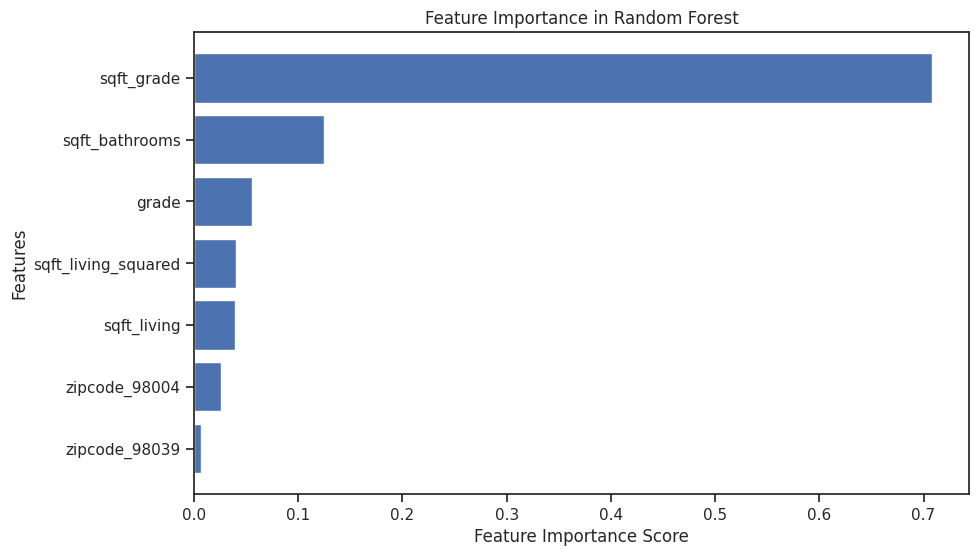

In [34]:
# Initialize MLR model
mlr = LinearRegression()

# Use RFE to select the top 7 features (matching dataset feature count)
rfe = RFE(mlr, n_features_to_select=7)
rfe.fit(X_train, y_train)

# Print selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Train MLR with only selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

mlr_rfe = LinearRegression()
mlr_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = mlr_rfe.predict(X_test_rfe)

# Evaluate the performance
rmse_rfe = mean_squared_error(y_test, y_pred_rfe) ** 0.5  # Manually calculate RMSE
r2_rfe = r2_score(y_test, y_pred_rfe)

print(f"MLR with RFE RMSE: {rmse_rfe:.4f}")
print(f"MLR with RFE R^2 Score: {r2_rfe:.4f}")  # Using ^2 instead of special character

# Feature Importance in Random Forest
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Flip to show most important on top
plt.show()

## **MLR with RFE + Random Forest Feature Analysis**

- **Top Selected Features (via RFE)**:
  - `sqft_living`, `grade`, `sqft_living_squared`, `sqft_grade`, `sqft_bathrooms`, `zipcode_98004`, `zipcode_98039`

- **MLR Model Performance**:
  - RMSE: **0.3423**
  - R² Score: **0.5673**

- **Top Feature (Random Forest)**:
  - `sqft_grade` dominates with **70.8%** importance, followed by:
    - `sqft_bathrooms` (12.4%)
    - `grade`, `sqft_living_squared`, `sqft_living` (under 6% each)

> 🔍 Insight: `sqft_grade` is a highly influential predictor of the target variable, suggesting it's a strong engineered feature.

# **Final Analysis**

## Baseline Models: Linear Regression

### Model 0 (All Features)
- **R² Score**: 0.8900 → Explains 89% of variance in house prices — excellent.
- **RMSE**: 0.1726 → Lowest of all models.
- **MAE & MSE**: Also the lowest, indicating tight, reliable predictions.

**Feature Importance**:
- `sqft_living` dominates, followed by zip codes and grade.
- Strong presence of location-based variables (zip codes) that significantly improve predictive power.

**Conclusion**: Model 0 is the most accurate and robust in raw performance.

### Model 1 (Removed Location Features)
- **R² Score**: 0.557 → Major drop (~33% loss in explained variance).
- **RMSE**: 0.3464 → Nearly doubles compared to Model 0.

**Feature Behavior**:
- `grade` becomes dominant.
- `sqft_living` loses significance → indicates omitted variable bias and multicollinearity.

**Conclusion**: Model 1 is underperforming due to loss of critical location features.

### Model 2 (Added sqft_living15)
- **R² Score**: 0.5612 → Small recovery.
- **RMSE**: 0.3447 → Slightly better than Model 1.

**Coefficient Observations**:
- `sqft_living15` has a small but positive influence.
- Still far off from Model 0's performance.

**Conclusion**: Slightly better than Model 1, but not sufficient for strong performance. Still lacks spatial granularity.

## Regularization Models

### Ridge Regression
- **RMSE**: 0.3423
- **R² Score**: Comparable to simpler MLR variants (Model 2-level)

**Insight**:
- Helped reduce overfitting compared to Model 1 and 2.
- Didn't outperform Model 0, which suggests Model 0 was already well-regularized implicitly via feature importance.

**Use Case**: Good when you want to maintain all features with better generalization and handle potential multicollinearity.

### Lasso Regression
- **RMSE**: 0.3557
- Slightly worse than Ridge, probably due to zeroing out valuable features.

**Insight**:
- Lasso is useful for feature selection, but in this case, it likely removed impactful predictors.

**Conclusion**: Underperforms Ridge and Linear with full features.

## Cross-Validation Performance

| Model   | CV RMSE |
|---------|---------|
| Ridge   | 0.3426  |
| Lasso   | 0.3577  |

**Observation**: Ridge wins slightly; confirms it generalizes better. However, both are inferior to Model 0, which isn't cross-validated here — suggesting risk of overfitting should be assessed further.

## KNN Regression

| K   | RMSE   | R² Score |
|-----|--------|----------|
| 5   | 0.3811 | 0.4638   |
| 10  | 0.3697 | 0.4952   |

**Insight**:
- Performance is modest. Even best K=10 gives R² ≈ 0.50.
- KNN doesn't scale well and lacks feature interpretability.

**Conclusion**: Not suitable for this regression task — low performance and interpretability.

## Random Forest Regressor

| Metric  | Value   |
|---------|---------|
| R²      | 0.5099  |
| RMSE    | 0.3643  |

**Insight**:
- Best among non-linear models (better than Ridge/Lasso/KNN).
- Still underperforms compared to Model 0 (R² = 0.89).

**Good Choice if**:
- You're optimizing for non-linear relationships or feature engineering.
- Interpretability is less critical.

## SVR (Linear Kernel)

| R² Score          | -1.23 × 10¹⁷ (negative!) |
|-------------------|--------------------------|
| RMSE              | Over 180 million         |

**Critical Failure**:
- Did not converge.
- Features were unscaled → SVR is highly sensitive.
- Not a viable model without preprocessing.

**Conclusion**: Not usable in its current form.

## MLR with RFE + Feature Engineering

| Metric     | Value   |
|------------|---------|
| RMSE       | 0.3423  |
| R² Score   | 0.5673  |
| **Top Feature**: `sqft_grade` (70% importance) |

**Insight**:
- `sqft_grade` (interaction of sqft and grade) is a powerful engineered feature.
- Lower R² than Model 0, but a more interpretable and parsimonious model.

**Conclusion**: Best alternative to Model 0 if model simplicity or interpretability is preferred.

## Final Recommendation

**Best Overall Model**: Model 0 (All Features, Linear Regression)
- **R² Score**: 0.8900 — Outstanding predictive power
- **RMSE**: 0.1726 — Lowest error among all models
- **Interpretability**: High — you get clear coefficient insights.
- **Simplicity**: Acceptable, though could be improved with feature engineering.

> If your goal is prediction accuracy, Model 0 is the best choice.  
> It outperforms all others significantly.